# Primer Examen 15%

## Ejercicio 1
El siguiente url entrega 100 artículos (ver`/work?rows=100` al final del url) de la revista con el ISSN: 1029-8479 correspondiente a "Journal of High Energy Physics" en formato JSON usando el API de CrossRef:

https://api.crossref.org/journals/1029-8479/works?rows=100

La base de datos con los 100 artículos que tambíen se puede cargar en otro DataFrame de Pandas, se encuentra anidada en la celda con fila `'items'` y columna `'messages'` la cual se puede obtener con el método `.loc['items','message']` del DataFrame original.

Obtenga la lista de DOIs para los artículos de Alessandro Strumia en esa base de datos anidada

In [95]:
import pandas as pd
import numpy as np

In [75]:
df=pd.read_json('https://api.crossref.org/journals/1029-8479/works?rows=100')  ## Leemos el archivo

In [78]:
df_n = df.loc['items','message']    ## Cargamos el otro DataFrame

In [135]:
df_n   ## Visualizamos el DataFrame

[{'DOI': '10.1088/1126-6708/2001/03/051',
  'ISSN': ['1029-8479'],
  'URL': 'http://dx.doi.org/10.1088/1126-6708/2001/03/051',
  'author': [{'affiliation': [],
    'family': 'Manjarín',
    'given': 'Juan José',
    'sequence': 'first'}],
  'container-title': ['Journal of High Energy Physics'],
  'content-domain': {'crossmark-restriction': False, 'domain': []},
  'created': {'date-parts': [[2002, 8, 25]],
   'date-time': '2002-08-25T03:22:39Z',
   'timestamp': 1030245759000},
  'deposited': {'date-parts': [[2007, 2, 13]],
   'date-time': '2007-02-13T20:56:13Z',
   'timestamp': 1171400173000},
  'indexed': {'date-parts': [[2020, 3, 30]],
   'date-time': '2020-03-30T18:43:28Z',
   'timestamp': 1585593808172},
  'is-referenced-by-count': 2,
  'issn-type': [{'type': 'electronic', 'value': '1029-8479'}],
  'issue': '03',
  'issued': {'date-parts': [[2001, 3, 29]]},
  'journal-issue': {'issue': '03',
   'published-online': {'date-parts': [[2001, 3, 1]]}},
  'member': '297',
  'page': '051-05

In [134]:
for d in df_n:  ## Accedemos a los diccionarios de df_n
  for k in d.get('author'):  ## Accedemos a los diccionarios con clave 'author'
    if k.get('given')=='Alessandro' and k.get('family')=='Strumia':   ## Buscamos si se encuentran estas condiciones en las diferentes listas de diccionarios 
      print(d.get('DOI'))  ## Imprimos aquel elemento del diccionario con clave DOI

10.1088/1126-6708/2000/12/016
10.1088/1126-6708/2001/11/048


## Ejercicio 2
2a) Genere un polinomio de numpy con 7 raices aleatorias entre 1 y 10

2b) Encuentre los puntos críticos del polinomio: las raices de la derivada el polinomio.

2c) Con alguna de los métodos para encontrar mínimos compruebe que el punto crítico de menor (mayor) valor corresponde al mínimo (máximo) global del polinomio

2d) Grafique el polinomío inclueyendo los puntos asociados a las raices.

2 a)

In [144]:
import pandas as pd
import numpy as np
import matplotlib,pylab as plt
from scipy import optimize
from scipy.interpolate import lagrange


In [109]:
y1 = np.zeros(7)                 ## Con esto garantizo que son las raíces
y2 = np.ones(1)                  ## Agregué un array nuevo para con valores distintos a cero para que no se me creara el polinomio 0
y = np.append(y1, y2)
x=np.random.uniform(1,10,8)
x

array([3.63112969, 1.13054635, 1.50282835, 8.35237674, 5.01577659,
       2.17499729, 2.60903434, 5.46916206])

In [110]:
df = pd.DataFrame({"x": x, "y": y})
df

,x,y
0,3.631130,0.0
1,1.130546,0.0
2,1.502828,0.0
3,8.352377,0.0
4,5.015777,0.0
5,2.174997,0.0
6,2.609034,0.0
7,5.469162,1.0


In [138]:
poly = lagrange(df.x, df.y)  ## Hallamos el polinomio de Lagrange
print(poly)

           7           6          5         4         3         2
-0.002567 x + 0.06268 x - 0.6071 x + 3.043 x - 8.564 x + 13.58 x - 11.25 x + 3.765


2 d)

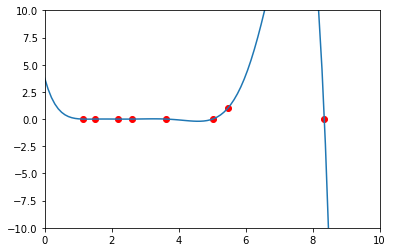

In [112]:
## Graficamos los puntos y el polinomio de Lagrange
x_ = np.linspace(0,10, 100)
plt.plot(df.x, df.y, "ro")
plt.plot(x_, poly(x_), "-")
plt.xlim(0,10)
plt.ylim(-10,10)
plt.show()

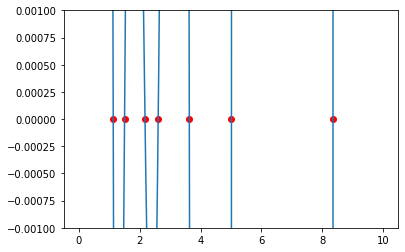

In [113]:
x_ = np.linspace(0,10, 10000)
plt.plot(df.x, df.y, "ro")
plt.plot(x_, poly(x_), "-")
plt.ylim(-0.001,0.001)
plt.show()

2 b)

In [140]:
## Derivamos el polinomio de Lagrange
dp = poly.deriv()
print(dp)

          6          5         4         3         2
-0.01797 x + 0.3761 x - 3.035 x + 12.17 x - 25.69 x + 27.15 x - 11.25


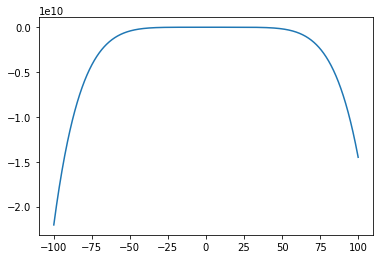

In [149]:
## Graficamos la derivada del polinomio de Lagrange
_x_ = np.linspace(-100,100, 1000)
plt.plot(_x_, dp(_x_), "-")
plt.show()

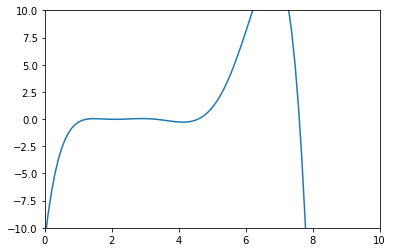

In [150]:
_x_ = np.linspace(0,10, 100)
plt.plot(_x_, dp(_x_), "-")
plt.xlim(0,10)
plt.ylim(-10,10)
plt.show()

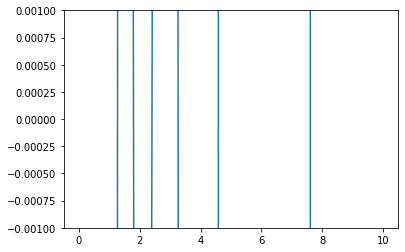

In [142]:
_x_ = np.linspace(0,10, 10000)
plt.plot(_x_, dp(_x_), "-")
plt.ylim(-0.001,0.001)
plt.show()

In [161]:
## Hallamos los puntos críticos del polinomio de Lagrange como los ceros de su primera derivada.
X = [0.5, 1.8, 2.3, 3.2, 4.5, 7.5]  ## Creamos una lista con los valores próximos a los puntos críticos
result = optimize.newton(dp, X)
print(result)  ## Lista de los puntos críticos

[1.27270316 1.79763441 2.40440735 3.26316322 4.58450934 7.60617339]


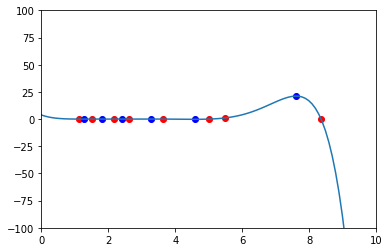

In [162]:
## Verificamos gráficamente que efectivamente los puntos anteriormente hallados corresponden con los máximos y mínimos del polinomio que definimos para el ejercicio
x_ = np.linspace(0,10, 100)
plt.plot(df.x, df.y, "ro")  ## Las raíces tienen el color rojo
plt.plot(result, poly(result),"ro", color='blue') ## Los puntos críticos tienen el color azul
plt.plot(x_, poly(x_), "-")
plt.xlim(0,10)
plt.ylim(-100,100)
plt.show()

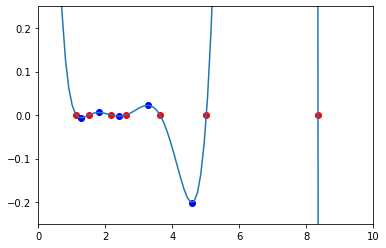

In [158]:
x_ = np.linspace(0,10, 100)
plt.plot(df.x, df.y, "ro")
plt.plot(result, poly(result),"ro", color='blue')
plt.plot(x_, poly(x_), "-")
plt.xlim(0,10)
plt.ylim(-0.25,0.25)
plt.show()

2 c)

In [166]:
## Mínimo Global
min=optimize.basinhopping(poly,5.5)
print(min['x'])

[4.58450936]


In [167]:
## Máximo Global
max=optimize.basinhopping(-poly,5.5)
print(max['x'])

[7.60617329]
